In [4]:
import tensorflow as tf
print(tf.__version__)

0.11.0


In [5]:
%matplotlib inline
import numpy.ma as ma
from numpy import isfinite



import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [7]:
cd /

/


In [8]:
cd Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017/

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [9]:
DataKarpos = pd.read_csv('Target.csv') # Only Karpos Location is used here . Other locations are zero

In [10]:
print ("Number of columns present : ");DataKarpos.columns.values.size

Number of columns present : 


27

In [11]:
DataKarpos.columns

Index(['Unnamed: 0', 'date', 'PM10', 'NAME', 'PM10_null_pointers', 'CO',
       'CO_null_pointers', 'NO2', 'NO2_null_pointers', 'O3',
       'O3_null_pointers', 'PM25', 'PM25_null_pointers', 'time', 'month',
       'day', 'hour', 'daysInterval', 'days_interval', 'hour_interval',
       'Centar', 'Gazi Baba', 'Karpos', 'Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat'],
      dtype='object')

In [12]:
DataKarpos.describe() # Describe data input 

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,60629.000000,89500.000000,57342.000000,89500.000000,42360.000000,89500.000000,50553.000000,89500.000000,36143.000000,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.476067,-0.450405,0.677419,-0.126302,0.640693,-0.025275,0.473296,0.164331,0.564838,0.066891,...,11.502346,0.0,0.096425,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,180855.980629,0.746962,0.467467,0.481382,0.479800,0.601696,0.499289,1.059082,0.495781,1.096480,...,6.921202,0.0,0.295174,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7.000000,-2.593269,0.000000,-0.465316,0.000000,-0.775219,0.000000,-1.071914,0.000000,-0.860290,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,156623.250000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,6.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,313248.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,...,12.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,469873.500000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,18.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,626496.000000,2.934737,1.000000,4.243175,1.000000,9.176899,1.000000,9.258671,1.000000,11.020234,...,23.000000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
DataKarpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 27 columns):
Unnamed: 0            89500 non-null int64
date                  89500 non-null object
PM10                  60629 non-null float64
NAME                  89500 non-null object
PM10_null_pointers    89500 non-null int64
CO                    57342 non-null float64
CO_null_pointers      89500 non-null int64
NO2                   42360 non-null float64
NO2_null_pointers     89500 non-null int64
O3                    50553 non-null float64
O3_null_pointers      89500 non-null int64
PM25                  36143 non-null float64
PM25_null_pointers    89500 non-null int64
time                  89500 non-null object
month                 89500 non-null int64
day                   89500 non-null int64
hour                  89500 non-null int64
daysInterval          89500 non-null object
days_interval         89500 non-null int64
hour_interval         89500 non-null int64
Centar           

## Extract Data And Feature set

In [14]:
TargetKarpos = DataKarpos[['PM10']].copy(deep=True) # copy PM10 data out from data sets

In [15]:
features_set = DataKarpos.copy(deep=True)

In [16]:
#del features_set['PM10'] # delete feature set  from data set

In [17]:
features_set.drop(['Unnamed: 0','date','day', 'time','Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat','daysInterval','NAME', 'hour_interval', 'days_interval','Centar', 'Gazi Baba'],axis=1,inplace=True)

In [18]:
print ("Number of columns present in Future set : ");features_set.columns.values.size

Number of columns present in Future set : 


13

In [19]:
features_set.columns

Index(['PM10', 'PM10_null_pointers', 'CO', 'CO_null_pointers', 'NO2',
       'NO2_null_pointers', 'O3', 'O3_null_pointers', 'PM25',
       'PM25_null_pointers', 'month', 'hour', 'Karpos'],
      dtype='object')

In [20]:
features_set[1:5] # Our feature set now comes out neat. Notice PM10 has been included in feature set.

,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,month,hour,Karpos
1,0.655947,1,0.332930,1,NaN,0,-0.094688,1,NaN,0,1,0,1.0
2,0.325387,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
3,0.325387,1,0.118908,1,NaN,0,-0.076718,1,NaN,0,1,1,1.0
4,0.159634,1,-0.031487,1,NaN,0,-0.030862,1,NaN,0,1,2,1.0


In [21]:
features_set.fillna(method='ffill',inplace=True);
features_set.fillna(features_set.median(),inplace=True);

In [22]:
features_set.isnull().sum()

PM10                  0
PM10_null_pointers    0
CO                    0
CO_null_pointers      0
NO2                   0
NO2_null_pointers     0
O3                    0
O3_null_pointers      0
PM25                  0
PM25_null_pointers    0
month                 0
hour                  0
Karpos                0
dtype: int64

# Analysis Of Mising Values For PM10

In [23]:
# Target and TargetKarpos defined above are the same

In [24]:
Target = DataKarpos[['PM10']].copy(deep=True)

In [25]:
Target.shape

(89500, 1)

In [26]:
null_data_PM10 = Target[Target.isnull().any(axis=1)] # extract data sets with null values

In [27]:
null_data_PM10.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [28]:
null_data_PM10.info() # Info about  non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28871 entries, 168 to 86692
Data columns (total 1 columns):
PM10    0 non-null float64
dtypes: float64(1)
memory usage: 451.1 KB


In [29]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 699.3 KB


In [30]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.450405
std,0.746962
min,-2.593269
25%,NaN
50%,NaN
75%,NaN
max,2.934737


In [31]:
def getPctMissing(series):
    '''
    Returns percentage of Missing data in a data set.
    Input : Pandas series
    Output: Percentage of missing data in data set
    '''
    num = series.isnull().sum()
    Total_data = len(series)
    return 100*(num/Total_data)

In [32]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [33]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [34]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    32.258101
dtype: float64

# Data After Cleaning

In [35]:
Target.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,60629.000000
mean,-0.450405
std,0.746962
min,-2.593269
25%,NaN
50%,NaN
75%,NaN
max,2.934737


In [36]:
Target = Target.reset_index(drop=True)

In [37]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 1 columns):
PM10    60629 non-null float64
dtypes: float64(1)
memory usage: 699.3 KB


In [38]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [39]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [40]:
Target.head()

,PM10
0,0.655947
1,0.655947
2,0.325387
3,0.325387
4,0.159634


# Other locations

In [41]:
All_data =  pd.read_csv('ItemListWithDummy.csv') 

In [42]:
All_data.columns

Index(['Unnamed: 0', 'date', 'PM10', 'NAME', 'PM10_null_pointers', 'CO',
       'CO_null_pointers', 'NO2', 'NO2_null_pointers', 'O3',
       'O3_null_pointers', 'PM25', 'PM25_null_pointers', 'time', 'month',
       'day', 'hour', 'daysInterval', 'days_interval', 'hour_interval',
       'Centar', 'Gazi Baba', 'Karpos', 'Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat'],
      dtype='object')

In [43]:
#All_data['PM25'].isnull().sum()

### Filter data per Loction

In [44]:
Lisice_loc_data = All_data[(All_data['Lisice']==1) ].copy(deep=True) # for Lisce location

In [45]:
Lisice_loc_data.head()

,Unnamed: 0,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,...,daysInterval,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
2,2,2007-01-02 00:00:00,NaN,Lisice,0,1.923636,1,NaN,0,NaN,...,0 days 00:00:00.000000000,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,11,2007-01-02 00:00:00,NaN,Lisice,0,1.923636,1,NaN,0,NaN,...,0 days 00:00:00.000000000,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17,17,2007-01-02 01:00:00,NaN,Lisice,0,1.964127,1,NaN,0,NaN,...,0 days 00:00:00.000000000,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23,23,2007-01-02 01:00:00,NaN,Lisice,0,1.964127,1,NaN,0,NaN,...,0 days 00:00:00.000000000,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33,33,2007-01-02 02:00:00,NaN,Lisice,0,1.408826,1,NaN,0,NaN,...,0 days 00:00:00.000000000,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
Lisice_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,71515.000000,89500.000000,61355.000000,89500.000000,41410.000000,89500.000000,69198.000000,89500.000000,0.0,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.470291,-0.225271,0.799050,0.303293,0.685531,-0.185976,0.462682,-0.237666,0.773162,NaN,...,11.502346,0.0,0.089855,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,180855.978853,0.912469,0.400713,1.014127,0.464307,0.843020,0.498608,0.936408,0.418789,NaN,...,6.921202,0.0,0.286092,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,-2.591076,0.000000,-0.465316,0.000000,-0.777982,0.000000,-1.071914,0.000000,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,156625.000000,NaN,1.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,...,6.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,313248.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,...,12.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,469871.500000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,18.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,626497.000000,3.177814,1.000000,12.954462,1.000000,12.230470,1.000000,4.372541,1.000000,NaN,...,23.000000,0.0,2.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
Lisice_loc_data.shape

(89500, 27)

In [48]:
Lisice_loc_data.isnull().sum() # drop columns that are all null 

Unnamed: 0                0
date                      0
PM10                  17985
NAME                      0
PM10_null_pointers        0
CO                    28145
CO_null_pointers          0
NO2                   48090
NO2_null_pointers         0
O3                    20302
O3_null_pointers          0
PM25                  89500
PM25_null_pointers        0
time                      0
month                     0
day                       0
hour                      0
daysInterval              0
days_interval             0
hour_interval             0
Centar                    0
Gazi Baba                 0
Karpos                    0
Lisice                    0
Miladinovci               0
Mrsevci                   0
Rektorat                  0
dtype: int64

In [49]:
Lisice_loc_data.drop(['PM25','PM25_null_pointers'],axis=1,inplace=True) # dropping null columns

In [50]:
Lisice_loc_data.fillna(method='ffill',inplace=True); # forward fill
#Lisice_loc_data.fillna(method='bfill',inplace=True); # backward fill
Lisice_loc_data.fillna(Lisice_loc_data.median(),inplace=True);

In [51]:
Lisice_loc_data.isnull().sum()

Unnamed: 0            0
date                  0
PM10                  0
NAME                  0
PM10_null_pointers    0
CO                    0
CO_null_pointers      0
NO2                   0
NO2_null_pointers     0
O3                    0
O3_null_pointers      0
time                  0
month                 0
day                   0
hour                  0
daysInterval          0
days_interval         0
hour_interval         0
Centar                0
Gazi Baba             0
Karpos                0
Lisice                0
Miladinovci           0
Mrsevci               0
Rektorat              0
dtype: int64

In [52]:
Lisice_loc_data.describe()

,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,month,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.470291,-0.196401,0.799050,0.313818,0.685531,-0.201692,0.462682,-0.315526,0.773162,6.408492,...,11.502346,0.0,0.089855,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,180855.978853,0.887473,0.400713,1.082659,0.464307,0.679670,0.498608,0.876902,0.418789,3.502213,...,6.921202,0.0,0.286092,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,-2.591076,0.000000,-0.465316,0.000000,-0.777982,0.000000,-1.071914,0.000000,1.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,156625.000000,-0.746142,1.000000,-0.297568,0.000000,-0.516431,0.000000,-0.954796,1.000000,3.000000,...,6.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,313248.000000,-0.349167,1.000000,-0.100899,1.000000,-0.389340,0.000000,-0.677802,1.000000,6.000000,...,12.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,469871.500000,0.229467,1.000000,0.390774,1.000000,-0.296631,1.000000,0.023050,1.000000,9.000000,...,18.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,626497.000000,3.177814,1.000000,12.954462,1.000000,12.230470,1.000000,4.372541,1.000000,12.000000,...,23.000000,0.0,2.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Location centar (Not used . Too much null values)

In [53]:
Centar_loc_data = All_data[(All_data['Centar']==1) ].copy(deep=True) # for Lisce location

In [54]:
Centar_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,46989.000000,89500.000000,45322.000000,89500.000000,39935.000000,89500.000000,44082.000000,89500.000000,43228.000000,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.568916,-0.363755,0.525017,0.010291,0.506391,0.246926,0.446201,-0.081323,0.492536,-0.055927,...,11.502346,0.0,0.221899,1.0,0.0,0.0,0.0,0.0,0.0,0.0
std,180855.995775,0.742223,0.499377,0.595482,0.499962,0.757206,0.497100,0.968267,0.499947,0.907765,...,6.921202,0.0,0.415607,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,-2.593269,0.000000,-0.465316,0.000000,-0.773684,0.000000,-1.071914,0.000000,-0.860290,...,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156628.250000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,6.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,313248.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,0.000000,NaN,...,12.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,469872.250000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,18.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,626499.000000,3.335468,1.000000,5.880157,1.000000,12.609288,1.000000,7.909021,1.000000,11.790736,...,23.000000,0.0,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
Centar_loc_data.isnull().sum()

Unnamed: 0                0
date                      0
PM10                  42511
NAME                      0
PM10_null_pointers        0
CO                    44178
CO_null_pointers          0
NO2                   49565
NO2_null_pointers         0
O3                    45418
O3_null_pointers          0
PM25                  46272
PM25_null_pointers        0
time                      0
month                     0
day                       0
hour                      0
daysInterval              0
days_interval             0
hour_interval             0
Centar                    0
Gazi Baba                 0
Karpos                    0
Lisice                    0
Miladinovci               0
Mrsevci                   0
Rektorat                  0
dtype: int64

In [56]:
Centar_loc_data.count().sum()

2188556

In [57]:
Centar_loc_data.fillna(method='ffill',inplace=True); # forward fill
Centar_loc_data.fillna(method='bfill',inplace=True); # backward fill
Centar_loc_data.fillna(Lisice_loc_data.median(),inplace=True);

In [58]:
Centar_loc_data.describe()

,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.568916,-0.007193,0.525017,0.593915,0.506391,0.150198,0.446201,0.357485,0.492536,0.010768,...,11.502346,0.0,0.221899,1.0,0.0,0.0,0.0,0.0,0.0,0.0
std,180855.995775,0.813016,0.499377,1.127780,0.499962,1.054934,0.497100,0.972343,0.499947,1.065679,...,6.921202,0.0,0.415607,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,-2.593269,0.000000,-0.465316,0.000000,-0.773684,0.000000,-1.071914,0.000000,-0.860290,...,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156628.250000,-0.647616,0.000000,-0.297568,0.000000,-0.241680,0.000000,-0.736361,0.000000,-0.381003,...,6.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,313248.000000,0.014582,1.000000,-0.025702,1.000000,-0.241680,0.000000,0.968362,0.000000,-0.306294,...,12.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,469872.250000,0.461993,1.000000,2.120305,1.000000,0.267299,1.000000,1.118323,1.000000,-0.189586,...,18.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,626499.000000,3.335468,1.000000,5.880157,1.000000,12.609288,1.000000,7.909021,1.000000,11.790736,...,23.000000,0.0,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
Centar_loc_data.isnull().sum()

Unnamed: 0            0
date                  0
PM10                  0
NAME                  0
PM10_null_pointers    0
CO                    0
CO_null_pointers      0
NO2                   0
NO2_null_pointers     0
O3                    0
O3_null_pointers      0
PM25                  0
PM25_null_pointers    0
time                  0
month                 0
day                   0
hour                  0
daysInterval          0
days_interval         0
hour_interval         0
Centar                0
Gazi Baba             0
Karpos                0
Lisice                0
Miladinovci           0
Mrsevci               0
Rektorat              0
dtype: int64

# Gaziloc 

In [60]:
Gazi_loc_data = All_data[(All_data['Gazi Baba']==1) ].copy(deep=True) # for Lisce location

In [61]:
Gazi_loc_data.isnull().sum()

Unnamed: 0                0
date                      0
PM10                  49382
NAME                      0
PM10_null_pointers        0
CO                    27267
CO_null_pointers          0
NO2                   65236
NO2_null_pointers         0
O3                    89500
O3_null_pointers          0
PM25                  89500
PM25_null_pointers        0
time                      0
month                     0
day                       0
hour                      0
daysInterval              0
days_interval             0
hour_interval             0
Centar                    0
Gazi Baba                 0
Karpos                    0
Lisice                    0
Miladinovci               0
Mrsevci                   0
Rektorat                  0
dtype: int64

In [62]:
Gazi_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.00000,40118.000000,89500.000000,62233.000000,89500.000000,24264.000000,89500.000000,0.0,89500.0,0.0,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.47000,-0.385658,0.448246,-0.077796,0.695341,-0.047984,0.271106,NaN,0.0,NaN,...,11.502346,0.0,0.126011,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,180855.99081,0.948494,0.497317,0.457137,0.460266,0.675251,0.444533,NaN,0.0,NaN,...,6.921202,0.0,0.331864,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.00000,-2.580232,0.000000,-0.465316,0.000000,-0.777982,0.000000,NaN,0.0,NaN,...,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,156625.75000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,...,6.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,313248.00000,NaN,0.000000,NaN,1.000000,NaN,0.000000,NaN,0.0,NaN,...,12.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,469874.75000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,0.0,NaN,...,18.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,626495.00000,3.181856,1.000000,7.424588,1.000000,10.678972,1.000000,NaN,0.0,NaN,...,23.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
Gazi_loc_data.drop(['PM25','PM25_null_pointers','NO2','NO2_null_pointers','O3','O3_null_pointers'],axis=1,inplace=True)

In [64]:
Gazi_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,month,day,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.00000,40118.000000,89500.000000,62233.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.47000,-0.385658,0.448246,-0.077796,0.695341,6.408492,15.637564,11.502346,0.0,0.126011,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,180855.99081,0.948494,0.497317,0.457137,0.460266,3.502213,8.864868,6.921202,0.0,0.331864,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.00000,-2.580232,0.000000,-0.465316,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,156625.75000,NaN,0.000000,NaN,0.000000,3.000000,8.000000,6.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,313248.00000,NaN,0.000000,NaN,1.000000,6.000000,16.000000,12.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,469874.75000,NaN,1.000000,NaN,1.000000,9.000000,23.000000,18.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,626495.00000,3.181856,1.000000,7.424588,1.000000,12.000000,31.000000,23.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
Gazi_loc_data.fillna(method='ffill',inplace=True); # forward fill
#Gazi_loc_data.fillna(method='bfill',inplace=True); # backward fill
Gazi_loc_data.fillna(Lisice_loc_data.median(),inplace=True);

In [66]:
Gazi_loc_data.describe()

,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,month,day,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.00000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.47000,-0.307739,0.448246,-0.032906,0.695341,6.408492,15.637564,11.502346,0.0,0.126011,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,180855.99081,0.801104,0.497317,0.487180,0.460266,3.502213,8.864868,6.921202,0.0,0.331864,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.00000,-2.580232,0.000000,-0.465316,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,156625.75000,-0.537494,0.000000,-0.309137,0.000000,3.000000,8.000000,6.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,313248.00000,-0.349167,0.000000,-0.181881,1.000000,6.000000,16.000000,12.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,469874.75000,-0.007958,1.000000,0.124692,1.000000,9.000000,23.000000,18.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,626495.00000,3.181856,1.000000,7.424588,1.000000,12.000000,31.000000,23.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Miladinovic

In [67]:
Miladinovic_loc_data = All_data[(All_data['Miladinovci']==1) ].copy(deep=True) # for Lisce location

In [68]:
Miladinovic_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,54593.000000,89500.000000,43722.000000,89500.000000,14588.000000,89500.000000,57367.000000,89500.000000,0.0,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.562514,-0.687774,0.609978,-0.189034,0.488514,-0.272951,0.162994,0.320389,0.640972,NaN,...,11.502346,0.0,0.222927,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,180855.973609,0.650596,0.487758,0.247388,0.499871,0.384890,0.369363,0.997776,0.479718,NaN,...,6.921202,0.0,0.416320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,-2.582385,0.000000,-0.465316,0.000000,-0.777982,0.000000,-1.071604,0.000000,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,156628.500000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,6.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,313252.500000,NaN,1.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,...,12.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,469872.750000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,...,18.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,626494.000000,2.628594,1.000000,2.866491,1.000000,2.341898,1.000000,3.951163,1.000000,NaN,...,23.000000,0.0,2.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
Miladinovic_loc_data.isnull().sum()

Unnamed: 0                0
date                      0
PM10                  34907
NAME                      0
PM10_null_pointers        0
CO                    45778
CO_null_pointers          0
NO2                   74912
NO2_null_pointers         0
O3                    32133
O3_null_pointers          0
PM25                  89500
PM25_null_pointers        0
time                      0
month                     0
day                       0
hour                      0
daysInterval              0
days_interval             0
hour_interval             0
Centar                    0
Gazi Baba                 0
Karpos                    0
Lisice                    0
Miladinovci               0
Mrsevci                   0
Rektorat                  0
dtype: int64

In [70]:
Miladinovic_loc_data.drop(['PM25','PM25_null_pointers','NO2','NO2_null_pointers','CO','CO_null_pointers'],axis=1,inplace=True)

In [71]:
Miladinovic_loc_data.fillna(method='ffill',inplace=True); # forward fill
#Gazi_loc_data.fillna(method='bfill',inplace=True); # backward fill
Miladinovic_loc_data.fillna(Lisice_loc_data.median(),inplace=True);

In [72]:
Miladinovic_loc_data.describe()

,Unnamed: 0,PM10,PM10_null_pointers,O3,O3_null_pointers,month,day,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.562514,-0.597326,0.609978,0.190847,0.640972,6.408492,15.637564,11.502346,0.0,0.222927,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,180855.973609,0.586863,0.487758,0.941142,0.479718,3.502213,8.864868,6.921202,0.0,0.416320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,-2.582385,0.000000,-1.071604,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,156628.500000,-0.982796,0.000000,-0.677802,0.000000,3.000000,8.000000,6.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,313252.500000,-0.557909,1.000000,0.126845,1.000000,6.000000,16.000000,12.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,469872.750000,-0.349167,1.000000,0.735675,1.000000,9.000000,23.000000,18.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,626494.000000,2.628594,1.000000,3.951163,1.000000,12.000000,31.000000,23.000000,0.0,2.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Msevci_loc_data

In [73]:
Msevci_loc_data = All_data[(All_data['Mrsevci']==1) ].copy(deep=True) # for Lisce location

In [74]:
Msevci_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,23125.000000,89500.000000,30154.000000,89500.000000,32369.000000,89500.000000,0.0,89500.0,0.0,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.480659,-0.509751,0.258380,-0.251207,0.336916,-0.029195,0.361665,NaN,0.0,NaN,...,11.502346,0.0,0.125922,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,180855.969433,0.913344,0.437746,0.294781,0.472659,1.937834,0.480485,NaN,0.0,NaN,...,6.921202,0.0,0.331965,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4.000000,-2.569584,0.000000,-0.465316,0.000000,-0.777368,0.000000,NaN,0.0,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,156627.500000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,...,6.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,313253.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,...,12.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,469873.500000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,0.0,NaN,...,18.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,626498.000000,3.187210,1.000000,32.343727,1.000000,104.502219,1.000000,NaN,0.0,NaN,...,23.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
Msevci_loc_data.isnull().sum() # not used too many null values

Unnamed: 0                0
date                      0
PM10                  66375
NAME                      0
PM10_null_pointers        0
CO                    59346
CO_null_pointers          0
NO2                   57131
NO2_null_pointers         0
O3                    89500
O3_null_pointers          0
PM25                  89500
PM25_null_pointers        0
time                      0
month                     0
day                       0
hour                      0
daysInterval              0
days_interval             0
hour_interval             0
Centar                    0
Gazi Baba                 0
Karpos                    0
Lisice                    0
Miladinovci               0
Mrsevci                   0
Rektorat                  0
dtype: int64

### Rectorat Loc

In [76]:
Rektorat_loc_data = All_data[(All_data['Rektorat']==1) ].copy(deep=True) # for Lisce location

In [77]:
Rektorat_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,...,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,73818.000000,89500.000000,52723.000000,89500.000000,27788.000000,89500.000000,70476.000000,89500.000000,0.0,...,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.471553,-0.364577,0.824782,0.167835,0.589084,0.180006,0.310480,-0.094448,0.787441,NaN,...,11.502346,0.0,0.096525,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,180855.986254,0.845148,0.380155,2.089573,0.492003,0.717749,0.462693,0.951282,0.409120,NaN,...,6.921202,0.0,0.295463,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,-2.573820,0.000000,-0.465316,0.000000,-0.777675,0.000000,-1.057042,0.000000,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,156625.500000,NaN,1.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,...,6.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,313250.500000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,...,12.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,469871.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,...,18.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,626493.000000,3.182633,1.000000,31.331459,1.000000,6.174287,1.000000,6.582919,1.000000,NaN,...,23.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
Rektorat_loc_data.isnull().sum()

Unnamed: 0                0
date                      0
PM10                  15682
NAME                      0
PM10_null_pointers        0
CO                    36777
CO_null_pointers          0
NO2                   61712
NO2_null_pointers         0
O3                    19024
O3_null_pointers          0
PM25                  89500
PM25_null_pointers        0
time                      0
month                     0
day                       0
hour                      0
daysInterval              0
days_interval             0
hour_interval             0
Centar                    0
Gazi Baba                 0
Karpos                    0
Lisice                    0
Miladinovci               0
Mrsevci                   0
Rektorat                  0
dtype: int64

In [79]:
Rektorat_loc_data.drop(['PM25','PM25_null_pointers','NO2','NO2_null_pointers'],axis=1,inplace=True)

In [80]:
Rektorat_loc_data.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,O3,O3_null_pointers,month,day,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,73818.000000,89500.000000,52723.000000,89500.000000,70476.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.471553,-0.364577,0.824782,0.167835,0.589084,-0.094448,0.787441,6.408492,15.637564,11.502346,0.0,0.096525,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,180855.986254,0.845148,0.380155,2.089573,0.492003,0.951282,0.409120,3.502213,8.864868,6.921202,0.0,0.295463,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,-2.573820,0.000000,-0.465316,0.000000,-1.057042,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,156625.500000,NaN,1.000000,NaN,0.000000,NaN,1.000000,3.000000,8.000000,6.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,313250.500000,NaN,1.000000,NaN,1.000000,NaN,1.000000,6.000000,16.000000,12.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,469871.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,9.000000,23.000000,18.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,626493.000000,3.182633,1.000000,31.331459,1.000000,6.582919,1.000000,12.000000,31.000000,23.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
Rektorat_loc_data.fillna(method='ffill',inplace=True); # forward fill
#Gazi_loc_data.fillna(method='bfill',inplace=True); # backward fill
Rektorat_loc_data.fillna(Lisice_loc_data.median(),inplace=True);

In [82]:
Rektorat_loc_data.describe()

,Unnamed: 0,PM10,PM10_null_pointers,CO,CO_null_pointers,O3,O3_null_pointers,month,day,hour,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
count,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.0,89500.000000,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0,89500.0
mean,313249.471553,-0.296332,0.824782,1.239858,0.589084,-0.102220,0.787441,6.408492,15.637564,11.502346,0.0,0.096525,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,180855.986254,0.860412,0.380155,5.692331,0.492003,0.909601,0.409120,3.502213,8.864868,6.921202,0.0,0.295463,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,-2.573820,0.000000,-0.465316,0.000000,-1.057042,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,156625.500000,-0.823936,1.000000,-0.245509,0.000000,-0.850691,1.000000,3.000000,8.000000,6.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,313250.500000,-0.370381,1.000000,-0.043055,1.000000,-0.449762,1.000000,6.000000,16.000000,12.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,469871.000000,0.195452,1.000000,0.373421,1.000000,0.420571,1.000000,9.000000,23.000000,18.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,626493.000000,3.182633,1.000000,31.331459,1.000000,6.582919,1.000000,12.000000,31.000000,23.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Join the Columns

In [83]:
def delColumns(DataframeList):
    '''
    Takes as input the data frames
    drop columns of the data frames
    '''
    DataframeList.drop(['Unnamed: 0','date','day', 'time','Lisice', 'Miladinovci', 'Mrsevci',
       'Rektorat','daysInterval','NAME', 'hour_interval', 'days_interval','Centar','Karpos', 'Gazi Baba'],axis=1,inplace=True)
    return DataframeList

In [84]:
delColumns(Lisice_loc_data);delColumns(Centar_loc_data);delColumns(Gazi_loc_data);delColumns(Miladinovic_loc_data);
delColumns(Msevci_loc_data);delColumns(Rektorat_loc_data);

In [85]:
results = pd.concat([features_set,Lisice_loc_data,Gazi_loc_data,Miladinovic_loc_data,
                   Rektorat_loc_data], axis=0) # concatenating yields nan because of unequal column length 
                                               # Solution is to define new func

In [86]:
results.describe()#null values present

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CO,CO_null_pointers,Karpos,NO2,NO2_null_pointers,O3,O3_null_pointers,PM10,PM10_null_pointers,PM25,PM25_null_pointers,hour,month
count,358000.000000,358000.000000,89500.0,179000.000000,179000.000000,358000.000000,358000.000000,447500.000000,447500.000000,89500.000000,89500.000000,447500.000000,447500.000000
mean,0.409385,0.652662,1.0,-0.092558,0.467989,-0.077320,0.691603,-0.308915,0.671895,0.066293,0.403832,11.502346,6.408492
std,2.966321,0.476125,0.0,0.611016,0.498976,0.921278,0.461832,0.816643,0.469524,1.220285,0.490667,6.921172,3.502197
min,-0.465316,0.000000,1.0,-0.777982,0.000000,-1.071914,0.000000,-2.593269,0.000000,-0.860290,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.814716,0.000000,NaN,NaN,6.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.349167,1.000000,NaN,NaN,12.000000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140052,1.000000,NaN,NaN,18.000000,9.000000
max,31.331459,1.000000,1.0,12.230470,1.000000,9.258671,1.000000,3.182633,1.000000,11.020234,1.000000,23.000000,12.000000


In [87]:
result = features_set.copy(deep=True);# copy the previous featre set

In [88]:
result.shape

(89500, 13)

In [89]:
i=0;
def concatenator(dataFrame):
    '''
    Wrote this function so that I can 
    concatenate two dataframe without 
    returning Nan when the columns are not equal
    Outer and Inner join would be a good candidate for this
    task but they return Nan where the columns are not equal. (in breadth and not length)
    
    Input : dataframe
    Output : columns of 'dataframe' are added to 'result' defined above
    '''
    global i
    for x in dataFrame.columns:
        result[str(i)+x] = dataFrame[x].values;
        i=i+1
    return result    

<p>Locations to be added to featuire set
<li>Lisice_loc_data</li> 
<li>Gazi_loc_data</li> 
<li> Miladinovic_loc_data</li> 
<li> Rektorat_loc_data</li> </p>

In [90]:
concatenator(Lisice_loc_data);

In [91]:
result.shape

(89500, 23)

In [92]:
concatenator(Gazi_loc_data);

In [93]:
result.shape

(89500, 29)

In [94]:
concatenator(Miladinovic_loc_data);

In [95]:
result.shape

(89500, 35)

In [96]:
concatenator(Rektorat_loc_data);

In [97]:
result.shape

(89500, 43)

In [98]:
result.describe()

,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,...,20month,21hour,22PM10,23PM10_null_pointers,24CO,25CO_null_pointers,26O3,27O3_null_pointers,28month,29hour
count,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,...,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000,89500.000000
mean,-0.146778,0.677419,0.116768,0.640693,0.016576,0.473296,-0.082381,0.564838,0.066293,0.403832,...,6.408492,11.502346,-0.296332,0.824782,1.239858,0.589084,-0.102220,0.787441,6.408492,11.502346
std,0.835569,0.467467,0.635884,0.479800,0.510798,0.499289,0.885244,0.495781,1.220285,0.490667,...,3.502213,6.921202,0.860412,0.380155,5.692331,0.492003,0.909601,0.409120,3.502213,6.921202
min,-2.593269,0.000000,-0.465316,0.000000,-0.775219,0.000000,-1.071914,0.000000,-0.860290,0.000000,...,1.000000,0.000000,-2.573820,0.000000,-0.465316,0.000000,-1.057042,0.000000,1.000000,0.000000
25%,-0.815893,0.000000,-0.378550,0.000000,-0.214973,0.000000,-0.720869,0.000000,-0.402561,0.000000,...,3.000000,6.000000,-0.823936,1.000000,-0.245509,0.000000,-0.850691,1.000000,3.000000,6.000000
50%,-0.178067,1.000000,-0.152959,1.000000,-0.094635,0.000000,-0.329545,1.000000,-0.296817,0.000000,...,6.000000,12.000000,-0.370381,1.000000,-0.043055,1.000000,-0.449762,1.000000,6.000000,12.000000
75%,0.438952,1.000000,0.448618,1.000000,0.044812,1.000000,0.202445,1.000000,-0.148514,1.000000,...,9.000000,18.000000,0.195452,1.000000,0.373421,1.000000,0.420571,1.000000,9.000000,18.000000
max,2.934737,1.000000,4.243175,1.000000,9.176899,1.000000,9.258671,1.000000,11.020234,1.000000,...,12.000000,23.000000,3.182633,1.000000,31.331459,1.000000,6.582919,1.000000,12.000000,23.000000


# Delete Zero values 

In [99]:
Target.drop(Target.index[168:215],inplace=True);# 16 consecutive entries missing
Target.drop(Target.index[337:361],inplace=True);# 
Target.drop(Target.index[961:984],inplace=True);
Target.drop(Target.index[1082:1105],inplace=True)
Target.drop(Target.index[1088:1106],inplace=True)
Target.drop(Target.index[1569:1593],inplace=True)
Target.drop(Target.index[1689:1705],inplace=True)
Target.drop(Target.index[2272:2296],inplace=True)
Target.drop(Target.index[3470:3592],inplace=True)
Target.drop(Target.index[16707:35423],inplace=True)



In [100]:
result.drop(result.index[168:215],inplace=True);# 16 consecutive entries missin
result.drop(result.index[337:361],inplace=True);# 
result.drop(result.index[961:984],inplace=True);
result.drop(result.index[1082:1105],inplace=True)
result.drop(result.index[1088:1106],inplace=True)
result.drop(result.index[1569:1593],inplace=True)
result.drop(result.index[1689:1705],inplace=True)
result.drop(result.index[2272:2296],inplace=True)
result.drop(result.index[3470:3592],inplace=True)
result.drop(result.index[16707:35423],inplace=True)

In [101]:
result.head()

,PM10,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,O3_null_pointers,PM25,PM25_null_pointers,...,20month,21hour,22PM10,23PM10_null_pointers,24CO,25CO_null_pointers,26O3,27O3_null_pointers,28month,29hour
0,0.655947,1,0.332930,1,-0.094635,0,-0.094688,1,-0.296817,0,...,1,0,0.958855,1,1.113822,1,-0.839846,1,1,0
1,0.655947,1,0.332930,1,-0.094635,0,-0.094688,1,-0.296817,0,...,1,0,0.958855,1,1.113822,1,-0.839846,1,1,0
2,0.325387,1,0.118908,1,-0.094635,0,-0.076718,1,-0.296817,0,...,1,1,1.045076,1,0.795681,1,-0.860915,1,1,1
3,0.325387,1,0.118908,1,-0.094635,0,-0.076718,1,-0.296817,0,...,1,1,1.045076,1,0.795681,1,-0.860915,1,1,1
4,0.159634,1,-0.031487,1,-0.094635,0,-0.030862,1,-0.296817,0,...,1,2,0.329261,1,0.240380,1,-0.842635,1,1,2


In [102]:
Target = Target.reset_index(drop=True)
result = result.reset_index(drop=True)

In [103]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    10098
dtype: int64

In [104]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    14.330925
dtype: float64

In [105]:
result.columns.size # 43 columns

43

# Prepare Data 

In [106]:
column_size = result.columns.values.size # this is size of list element size
Target_list = Target.values.tolist() # create a list of values for use in data model
feature_list= result.values.tolist()

In [107]:
counter=0
def dataGetter(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter;
    assert type(datalist) == list;
    
    
    value = datalist[counter]
    #print(counter)


    counter = counter +1
             
    return np.array([value])

In [108]:
counter_t=0
def dataGetter_target(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter_t;
    assert type(datalist) == list;
    
    
    value = datalist[counter_t]
    #print(counter)


    counter_t = counter_t +1
             
    return np.array([value])

In [109]:
# Define window size or learning
sliding_window = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window.append(dataGetter(Target_list))

In [110]:
sliding_window_featureset = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window_featureset.append(dataGetter_target(feature_list))

In [111]:
column_size

43

In [112]:
import math
def get_pair(Target,Target2):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    
    Do some median filling. The target variable is converted into 
    a data frame and fill nan with median. The median is chosen because
    its more robust to outliers.
    
    Input: Feature List=Target2, Target=Target
    Input Dtype : List
    Output: Input Array, Output Array 24 steps ahead
    Output Data type : Array
    """
 
    global sliding_window
    global sliding_window_featureset
    sliding_window.append(dataGetter(Target))
    #print(len(sliding_window))
    sliding_window_featureset.append(dataGetter_target(Target2))
    df1 = pd.DataFrame({'test_set': sliding_window}) #MAKE A data frame with column name test_set
                 
    df1.fillna(df1.median(),inplace=True);
    input_value = sliding_window_featureset[0:24]
    
    
    input_value=np.array(input_value)
    
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,len(input_value)*column_size))
    
    #mx = np.ma.masked_invalid(input_value)
    
    ##print(input_value)
    sliding_window = df1.values.tolist()
    output_value = np.array(sliding_window[-1])
    
    ####remove last value from sliding_window
    _ = sliding_window_featureset[-1]
    ##print(output_value)
    sliding_window = sliding_window[1:]
    sliding_window_featureset = sliding_window_featureset[1:]
    #print(len(sliding_window))
    # Process output
    output = output_value.reshape(1,1);
     
    if math.isnan(output):
        assert (math.isnan(output))
        output1 = np.array([0.])
        output1 = output1.reshape(1,1)
    else:
        output1=output;
    
   
    
    
    return input_value,output1

# Build Model

In [113]:
#Imports
import tensorflow as tf
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *


In [114]:
input_size=column_size*(lag-1) # column size * window size

In [115]:
#Input Params
NUMBER=0; # replacement for nan
with tf.name_scope("input_target_placeholders"):    
    input_dim = 1
    ##The Input Layer as a Placeholder
    #Since we will provide data sequentially, the 'batch size'
    #is 1.
    features = tf.placeholder(tf.float32, [1, input_dim*input_size],name="input_data")
    y_input = tf.placeholder(tf.float32, [1, input_dim],name="target_data")
    

In [116]:
###inistate = tf.Variable(lstm_cell_with_dropout.zero_state(BATCH_SIZE, tf.float32), trainable=False)

In [117]:
with tf.name_scope("lstmLayer"):    
    lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*input_size,state_is_tuple=False)
    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name="initial_state")
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(features, lstm_state1)
    #The LSTM state will get updated
    lstm_update_op1 = lstm_state1.assign(lstm_state_output1)

In [118]:
lstm_output1.get_shape() # verify shape

TensorShape([Dimension(1), Dimension(1032)])

In [119]:
with tf.name_scope("weight_Bias_learning_rate"):
    global_step = tf.Variable(0, trainable=False,name="global_step")
    starter_learning_rate = 0.07
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1000, 1.0, staircase=False,name ="Exponential_decay")
    ##The Regression-Output Layer
    #The Weights and Biases matrices first
    output_W1 = tf.Variable(tf.truncated_normal([input_dim*input_size,input_dim]),name="weight")
    output_b1 = tf.Variable(tf.zeros([input_dim]),name="bias")
    
    

In [120]:
output_W1.get_shape()

TensorShape([Dimension(1032), Dimension(1)])

In [121]:
with tf.name_scope("prediction"):
    #Compute the output
    
    final_output = tf.matmul(lstm_output1, output_W1) + output_b1

In [122]:
final_output.get_shape() # verify output shape

TensorShape([Dimension(1), Dimension(1)])

In [123]:
output_W1 # verify weight shape

In [124]:
#loss = your regular output loss
lambda_l2_reg=0.5
l2 = lambda_l2_reg * sum(
    tf.nn.l2_loss(tf_var)
        for tf_var in tf.trainable_variables()
        if not ("noreg" in tf_var.name or "bias" in tf_var.name)
)
#loss += l2

In [125]:
with tf.name_scope("RMS_error"):
    ##Calculate the Sum-of-Squares Error
    
    error = tf.pow(tf.sub(final_output,y_input), 2) +l2

In [126]:
#error = tf.reshape(error,(1,))

In [127]:
with tf.name_scope("optimizer"):
    ##The Optimizer
    #Adam works best
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

In [128]:
# Create a summary to monitor MSE
mse=tf.summary.tensor_summary("errors_Summary",error)
# Create a summary to monitor  predictions
prediction=tf.summary.tensor_summary("predictions_Summmary", final_output)
# Create a summary to monitor bias
bias_vec=tf.summary.tensor_summary("bias", output_b1)
# create sumary
#rate_vec=tf.summary.scalar("rate", learning_rate)


#histogram plot

error_stats=tf.histogram_summary("errors_Histogram",error)
weight_stats=tf.histogram_summary("weights_Histogram",output_W1)
bias_stats=tf.histogram_summary("biases_Histogram",output_b1)
#learning_stats=tf.histogram_summary("biases_Histogram",learning_rate)


#merged_summary_op =  tf.merge_all_summaries()
merged_summary_op =   tf.merge_summary([mse,prediction,bias_vec,error_stats,weight_stats,bias_stats])

In [129]:
##Session
sess = tf.Session()
#Initialize all Variables
#sess.run(tf.initialize_all_variables())


In [130]:
len(Target)

70463

# Evaluation Data set

In [131]:
logs_path = '/Users/Seychelles/Desktop/GoogleTensorflow/finals/tensorboardData/mask_other_local_median/' # for tensorfboard

In [132]:
##Training Parameters
n_iter = len(Target_list)-48  # Train the model. Except the last 24 hrs which we will use for prediction test
                              # we could have also used the last 48 hrs as prediction test but lets keep
                              # things simple at first

actual_output1 = []
network_output1 = []
inner_iter = 6000



In [133]:
len(Target_list)

70463


# Feature and Target prediction set 

In [134]:
import copy
#new_list = copy.deepcopy(old_list)
Test_eval=copy.deepcopy(Target_list[n_iter:]) # copy out data set for validation and testing

In [135]:
n_iter = len(Target_list)-48  # Train the model. Except the last 24 hrs which we will use for prediction test
                              # we could have also used the last 48 hrs as prediction test but lets keep
                              # things simple at first

actual_output1 = []
network_output1 = []
inner_iter = 6000



# Errors Plot

In [136]:
writer = tf.train.SummaryWriter(logs_path, graph= tf.get_default_graph())

In [137]:
init = tf.initialize_all_variables()
error_=[]

sess.run(init)
counter =0 
counter_t=0
assert counter==0

for i in range(n_iter):
    input_v ,output_v = get_pair(Target_list,feature_list)
    #print(output_v.shape)
    
        
    #print(input_v)
    #print (dtype(input_v))
    #print(input_mask.shape)
    #print(output_mask.shape)
    #print(output_v.shape)
    _, _, network_output,errors,summary = sess.run([lstm_update_op1,
                                     train_step,
                                     final_output,error,merged_summary_op],
                                    feed_dict = {
                                        features:input_v,
                                        y_input: output_v})
    writer.add_summary(summary)
    error_.append(errors)
    if i%inner_iter==0 & i!=0:
           assert i!=0;
           #reset state
           sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))
        
    actual_output1.append(output_v)
        #actual_output2.append(output_v[0][1])
    network_output1.append(network_output)
        #network_output2.append(network_output[0][1])
        #x_axis.append(i)
                

In [138]:
errorplot = np.array(error_)
errorplot = errorplot.reshape(len(error_),1)

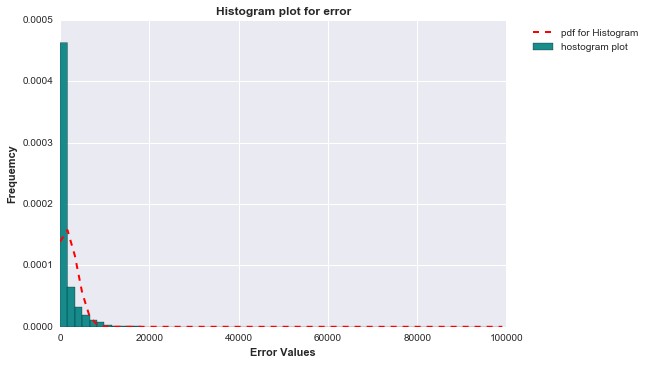

In [254]:
import matplotlib.mlab as mlab

#fig, ax = plt.subplots()
n, bins, patches=plt.hist(errorplot,60,normed=1,facecolor='teal',alpha=0.9,label='hostogram plot')
mu= np.mean(errorplot);sigma=np.std(errorplot);
y = mlab.normpdf( bins,mu,sigma)
plt.plot(bins, y, 'r--', linewidth=2,label='pdf for Histogram')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Histogram plot for error",fontweight='bold')
plt.ylabel("Frequemcy",fontweight='bold')
plt.xlabel("Error Values",fontweight='bold')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

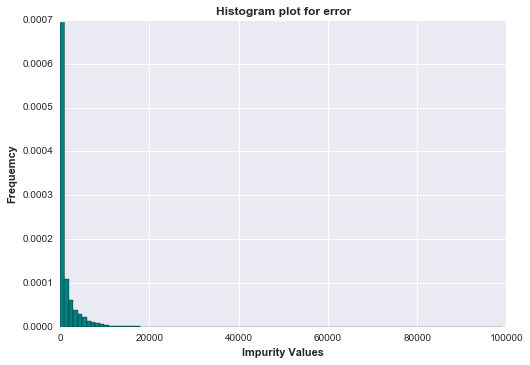

In [256]:
import matplotlib.mlab as mlab

fig, ax = plt.subplots()
plt.hist(errorplot,bins=100,normed=1,facecolor='teal')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("Histogram plot for error",fontweight='bold')
plt.ylabel("Frequemcy",fontweight='bold')
plt.xlabel("Impurity Values",fontweight='bold')
plt.show()

# Extract Date in the series

In [141]:
from matplotlib.dates  import  date2num
Data = pd.read_csv('ItemListWithDummy.csv')

In [142]:
pd.to_datetime(Data.date);

In [143]:
x_axis = Data['date']

In [144]:
x_axis = pd.to_datetime(x_axis)

In [145]:
#80000-len(network_output1)

In [146]:
network = np.array(network_output1)

In [147]:
actual= np.array(actual_output1)

In [148]:
actual.shape[0]

70415

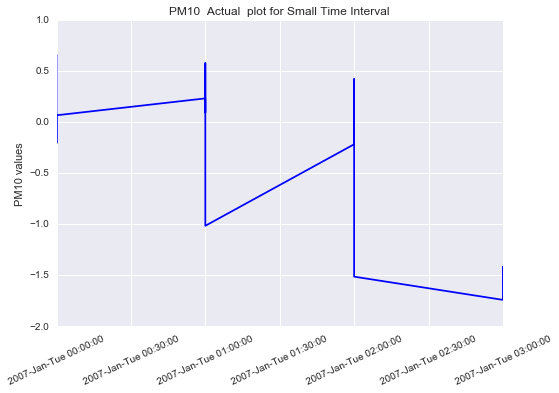

In [149]:
import matplotlib.pyplot 
import matplotlib.dates




fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot_date(x_axis[0:48], actual.reshape(actual.shape[0],1)[0:48], 'b-')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")



#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
#plt.tight_layout()
plt.ylabel("PM10 values")
plt.title("PM10  Actual  plot for Small Time Interval")
plt.show()

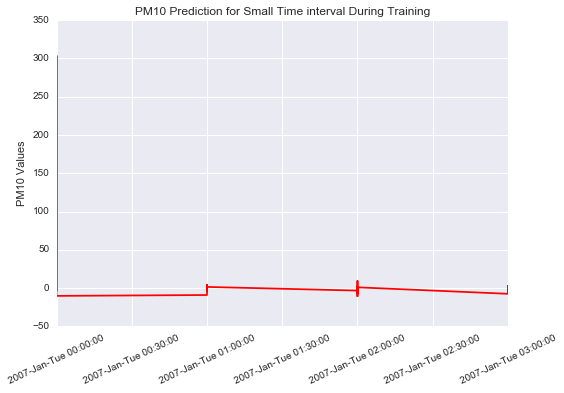

In [150]:
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:48], network.reshape(actual.shape[0],1)[0:48], 'r-')

#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 Values")
plt.title("PM10 Prediction for Small Time interval During Training")
plt.show()

# Plots predictions during Training

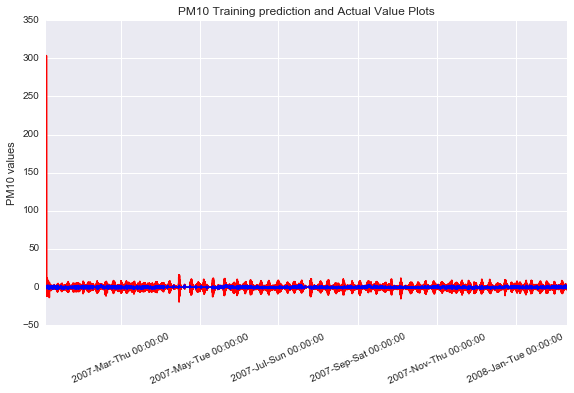

In [151]:
fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot(x_axis[0:actual.shape[0]], network.reshape(actual.shape[0],1)[0:actual.shape[0]], 'r-')
ax.plot_date(x_axis[0:actual.shape[0]], actual.reshape(actual.shape[0],1)[0:actual.shape[0]], 'b-')


#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
ax.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
ax.xaxis.grid(True, which="minor")

#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))


plt.xticks( rotation=25 )
plt.tight_layout()
plt.ylabel("PM10 values")
plt.title("PM10 Training prediction and Actual Value Plots")
plt.show()

In [157]:
Feature_eval =Target_list[-48:] # for testing

In [195]:
test = feature_list[-48:]; # feature set training

In [205]:
column_size

43

In [225]:
def get_pair_Test(Target):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    """
 
    
    global sliding_window_test
    #sliding_window_test.append(dataGetter(Target))
    #print(len(sliding_window))
    #sliding_window_featureset.append(dataGetter_target(Target2))
    
    #input_value = sliding_window_test
    
    
    input_value=np.array(sliding_window_test)
    print(input_value.shape)
    
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,len(sliding_window_test)*column_size))
    mx = np.ma.masked_invalid(input_value)
    
    ##print(input_value)
    #output_value = sliding_window[-1]
    #my = np.ma.masked_invalid(output_value)
    ####remove last value from sliding_window
    #_ = sliding_window_featureset[-1]
    ##print(output_value)
   # sliding_window = sliding_window[1:]
    #sliding_window_featureset = sliding_window_featureset[1:]
    #print(len(sliding_window))
    # Process output
    mask_x = ~mx.mask # let mask return true for those non-nan values
    ## y output
    #mask_y =~my.mask
    #mask_yfloat = mask_y
    return mx.data,mask_x.astype(float)

# Model Testing Plot

In [207]:
#input_value=np.array(sliding_window_test)

In [226]:
len(sliding_window_test)#*column_size

24

In [182]:
init =  tf.initialize_all_variables()


In [227]:
counter_test=0;
def dataGetter_test(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter_test;
    assert type(datalist) == list;
    
    
    value = datalist[counter_test]
    #print(counter)


    counter_test = counter_test +1
             
    return value

In [228]:
sliding_window_test = []
lag=25 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    temp=dataGetter_test(test)
    
    sliding_window_test.append(temp);
    

In [229]:
previous_sliding_window_length=24;
time_step_shift = 24;

In [230]:
len(sliding_window_test[23])

43

In [231]:
len(sliding_window_test)

24

In [257]:
43*24

1032

In [232]:
##Testing
 

#Flush LSTM state
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])));

In [233]:
len(sliding_window_test[12])

43

In [234]:
# Testing plot

actual_output_test = []
network_output_test = []

 
for i in range(previous_sliding_window_length):
   
    input_v,input_mask = get_pair_Test(sliding_window_test)
    _, network_output = sess.run([lstm_update_op1,
                                  final_output],
                                 feed_dict = {
                                     features:input_v})
       
    array_store=np.array(test[time_step_shift]) 
    array_store[[0]] = network_output # replace real PM10 values with predicted values
    list_store = array_store.tolist() # conver to list
    #print(len(list_store))
    sliding_window_test.append( list_store) # append new values for prediction
    #print(len(sliding_window_test))
    sliding_window_test.pop(0) # remove the first value of the list 
    #print(len(sliding_window_test))
    time_step_shift = time_step_shift + 1; # increae the time step
    network_output_test.append(network_output)

(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)
(24, 43)


In [219]:
a=np.array([[1,2,3],[4,5,6]])

In [222]:
a[0][0]=4

In [223]:
a

array([[4, 2, 3],
       [4, 5, 6]])

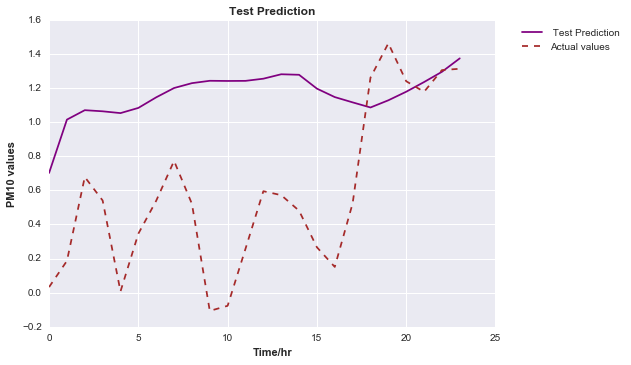

In [248]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(len(network_output_test),1), 'r-',color="purple",linestyle='-',marker="x",label=" Test Prediction")
ax.plot(np.array(Target_list[-24:]).reshape(len(Target_list[-24:]),1), 'b-',color='brown',linestyle='--',label="Actual values")

#ax.xaxis.set_minor_locator(dates.MonthLocator())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")

plt.ylabel("PM10 values",fontweight='bold')
plt.xlabel("Time/hr",fontweight='bold')
plt.title("Test Prediction",fontweight='bold')


#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

In [241]:
from sklearn.metrics import mean_squared_error

In [242]:
mean_squared_error(np.array(network_output_test).reshape(len(Target_list[-24:]),1),np.array(Target_list[-24:]).reshape(len(network_output_test),1) )**0.5 

0.72791042975371634

In [243]:
len(network_output_test)

24

In [244]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [245]:
rsquared(np.array(network_output_test).reshape(len(Target_list[-24:]),),np.array(Target_list[-24:]).reshape(len(network_output_test),) ) 

0.10106260160003755

# Smooth Plot

In [ ]:
from scipy.interpolate import interp1d


In [ ]:
xn_ax = np.linspace(0,24,24*2)



In [ ]:
x_ax = np.linspace(0,50,48)
y_cor=np.array(network_output_test).reshape

In [ ]:
y_cor=np.reshape(y_cor,(48))

In [ ]:
# new x values
xn_ax = np.linspace(1,48,48*10)
 
# new y values
yn_cor = interp1d(x_ax,y_cor, kind='cubic')

In [ ]:
plt.plot(xn_ax, yn_cor(xn_ax))
plt.xticks(x_ax, x_axis[-48:], size='small', rotation=70)
plt.tight_layout()
plt.show

# Prediction 

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(real.PM10, pred_)**0.5   # using scikit rmse function

In [ ]:
rmse =np.sqrt(np.sum((pred.values-real.PM10)**2)/len(pred))